# Read Me

This guide was meant to be paired with the Paperspace Blog article found here: blog.paperspace.com/ml-evaluation-metrics-part-1/

Use the blog along with this Notebook to see how you can use these ML evaluation metrics in Gradient. 

In [ ]:
import pandas as pd 
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn import tree, svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import *
import numpy as np
import seaborn as sns
data = load_breast_cancer()


In [ ]:
!wget https://raw.githubusercontent.com/plotly/datasets/master/auto-mpg.csv

--2022-01-18 03:46:37--  https://raw.githubusercontent.com/plotly/datasets/master/auto-mpg.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 

200 OK
Length: 10118 (9.9K) [text/plain]
Saving to: ‘auto-mpg.csv’

auto-mpg.csv        100%[===================>]   9.88K  --.-KB/s    in 0s      

2022-01-18 03:46:37 (74.9 MB/s) - ‘auto-mpg.csv’ saved [10118/10118]



# Regression Metrics

In [ ]:
mpg = pd.read_csv('auto-mpg.csv')
mpg = mpg.dropna()

In [ ]:
clf = tree.DecisionTreeRegressor()

X_train, X_test, y_train, y_test = train_test_split(mpg.drop('mpg', axis = 1), mpg['mpg'], test_size=0.33)

clf.fit(X_train, y_train)

pred = clf.predict(X_test)

In [ ]:
def RMSLE(y_true, y_pred):
    """
        The Root Mean Squared Log Error (RMSLE) metric 
        
        :param y_true: The ground truth labels given in the dataset
        :param y_pred: Our predictions
        :return: The RMSLE score
    """
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [ ]:
print("the mean squared error score is " + str(mean_squared_error(y_test, pred)))
print("the root mean squared error score is " + str(mean_squared_error(y_test, pred)))
print("the mean absolute error score is " + str(mean_absolute_error(y_test, pred)))
print("the RMSLE score is " + str(RMSLE(y_test, pred)))
print("the R^2 score is " + str(r2_score(y_test, pred)))

the mean squared error score is 16.70854961832061
the root mean squared error score is 16.70854961832061
the mean absolute error score is 2.738931297709924
the RMSLE score is 0.1509992391426919
the R^2 score is 0.7363976767028859


Text(0.5, 1.0, 'Predicted versus True for MPG against Weight')

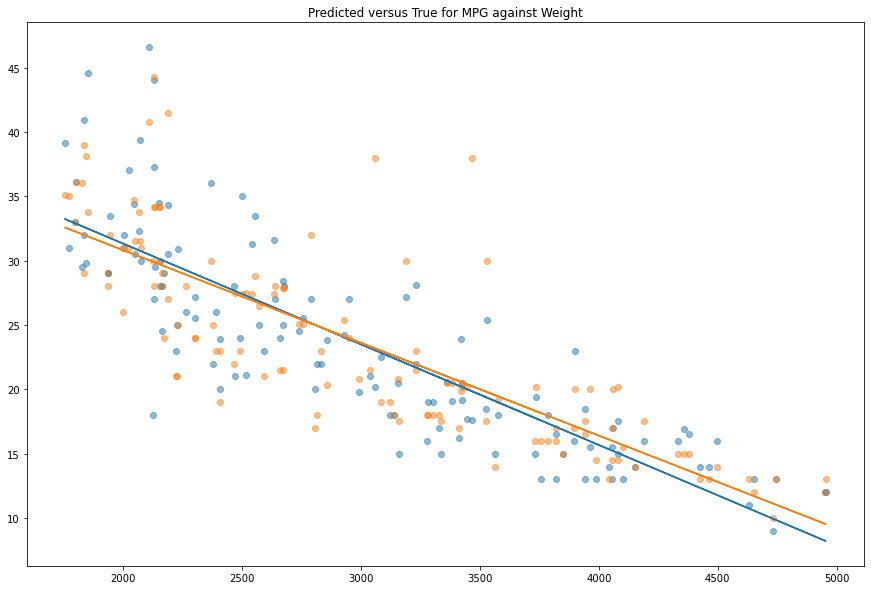

In [ ]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(figsize = (15,10))



plt.scatter(X_test['weight'], y_test, alpha = .5)
# plt.scatter(X_train['weight'], y_train)
plt.scatter(X_test['weight'], pred, alpha = .5)

m, b = np.polyfit(X_test['weight'], y_test, 1)
m1, b1 = np.polyfit(X_test['weight'], pred, 1)
plt.plot(X_test['weight'], m*X_test['weight'] + b)
plt.plot(X_test['weight'], m1*X_test['weight'] + b1)
ax.set_title('Predicted versus True for MPG against Weight')

# Classification Metrics

In [ ]:
cancer = pd.DataFrame(data= data['data'], columns = data['feature_names'])


In [ ]:
clf = tree.DecisionTreeClassifier()

X_train, X_test, y_train, y_test = train_test_split(cancer, data['target'], test_size=0.33)

clf.fit(X_train, y_train)

pred = clf.predict(X_test)



In [ ]:
print("the Accuracy score is " + str(accuracy_score(pred, y_test)))
print("the Precision score is " + str(precision_score(pred, y_test)))
print("the Recall score is " + str(recall_score(pred, y_test)))
print("the F1 score is " + str(f1_score(pred, y_test)))

the Accuracy score is 0.9521276595744681
the Precision score is 0.9841269841269841
the Recall score is 0.9465648854961832
the F1 score is 0.9649805447470817


In [ ]:
#Specificity
def perf_measure(y_actual, y_pred):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_pred)): 
        if y_actual[i]==y_pred[i]==1:
           TP += 1
        if y_pred[i]==1 and y_actual[i]!=y_pred[i]:
           FP += 1
        if y_actual[i]==y_pred[i]==0:
           TN += 1
        if y_pred[i]==0 and y_actual[i]!=y_pred[i]:
           FN += 1

    return(TP, FP, TN, FN)
    
TP, FP, TN, FN = perf_measure(y_test, pred)

print('the sensitivity of the model is ' + str(TN/TN+FP))


the sensitivity of the model is 8.0


# ROC

In [ ]:
classifier = OneVsRestClassifier(
    svm.SVC(kernel="linear", probability=True)
)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

plot_roc_curve(clf, X_test, y_test) 

# Precision Recall Curve

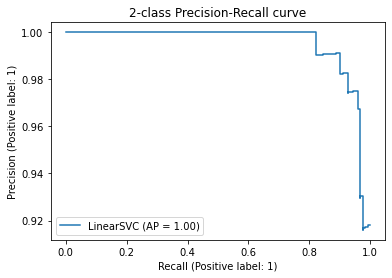

In [ ]:

display = PrecisionRecallDisplay.from_estimator(
    classifier, X_test, y_test, name="LinearSVC"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")